# Support Vector Machine
- A Support Vector Machine (SVM) is a very powerful and versatile Machine Learning model
- Capable of performing linear or nonlinear classification, regression, and even outlier detection. 
- One of the most popular and successful models in Machine Learning
- SVMs are particularly well suited for classification of complex but small- or medium-sized datasets.
- The idea is to classify the instances with a large margin of classification
- Understand the meaning of `kernel` and `soft margin` in SVM

If the dataset is linearly separable, there are infinitely many hyperplanes that can be used to separate the data. However, we want to have the best hyperplane such that it is robust to variations in test or new data. For example in the below figure, the left panel desribes two possible lines that can be used to classify the data. However the blue boundary line is prefered because it can still correctly classify the data even if there is small variation in new data points. The right figure describes the `margins` (dotted lines) which is the shortest distance between any data points to the boundary line. SVM tries to find the hyperplane that can maximise this margin. All the points that lie on these two pairs of margin lines are called `support vectors`.

<center><img src='./assets/SVM.png' width="500"></center>

Next, we are going to see how we can use a variant of SVM to perform a classification task. 
The dataset in this part is called the iris dataset in which we try to predict what type of flowers they are based on the flowers' features.
https://en.wikipedia.org/wiki/Iris_flower_data_set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# extract/prepare the input features (X) and target (y)
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
print(X.shape, y.shape) # X=(150,2), y=(150,)

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
print(X.shape, y.shape) # X=(100,2), y=(100,)


(150, 2) (150,)
(100, 2) (100,)


In [4]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [18]:
# SVM Classifier model: hard vs soft. Change the value of C here then rerun the experiment
# to see the difference between hard and soft margin classification

# Declare the SVC model with hard approach
# svm_clf = SVC(kernel="linear", C=1000) #hard

# Declare the SVC model with soft approach
svm_clf = SVC(kernel="linear", C=0.4) #soft

# Fit the model with available data
svm_clf.fit(X, y)

SVC(C=0.4, kernel='linear')

In [9]:
np.linspace(0, 5.5, 200)

array([0.        , 0.02763819, 0.05527638, 0.08291457, 0.11055276,
       0.13819095, 0.16582915, 0.19346734, 0.22110553, 0.24874372,
       0.27638191, 0.3040201 , 0.33165829, 0.35929648, 0.38693467,
       0.41457286, 0.44221106, 0.46984925, 0.49748744, 0.52512563,
       0.55276382, 0.58040201, 0.6080402 , 0.63567839, 0.66331658,
       0.69095477, 0.71859296, 0.74623116, 0.77386935, 0.80150754,
       0.82914573, 0.85678392, 0.88442211, 0.9120603 , 0.93969849,
       0.96733668, 0.99497487, 1.02261307, 1.05025126, 1.07788945,
       1.10552764, 1.13316583, 1.16080402, 1.18844221, 1.2160804 ,
       1.24371859, 1.27135678, 1.29899497, 1.32663317, 1.35427136,
       1.38190955, 1.40954774, 1.43718593, 1.46482412, 1.49246231,
       1.5201005 , 1.54773869, 1.57537688, 1.60301508, 1.63065327,
       1.65829146, 1.68592965, 1.71356784, 1.74120603, 1.76884422,
       1.79648241, 1.8241206 , 1.85175879, 1.87939698, 1.90703518,
       1.93467337, 1.96231156, 1.98994975, 2.01758794, 2.04522

In [19]:
svm_clf.intercept_, svm_clf.coef_

(array([-3.10569396]), array([[1.05693945, 0.61779358]]))

In [20]:
svm_clf.support_vectors_

array([[1.7, 0.5],
       [1.9, 0.2],
       [1.9, 0.4],
       [3.3, 1. ],
       [3.3, 1. ],
       [3. , 1.1]])

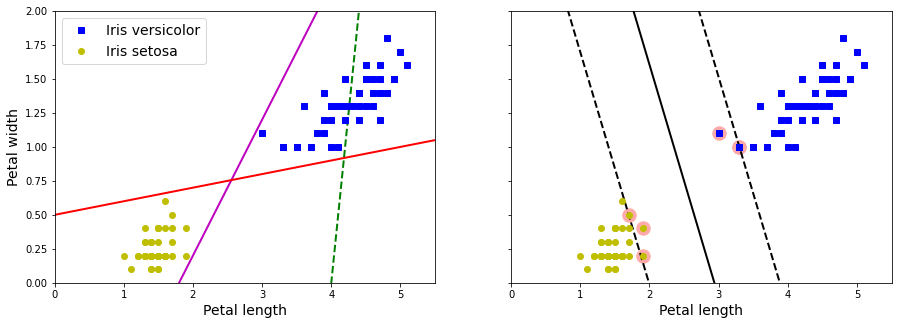

In [21]:
# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20 # decision boundary 1
pred_2 = x0 - 1.8 # decision boundary 2
pred_3 = 0.1 * x0 + 0.5 # decision boundary 3

# create a custom function to visualise the SVM decision boundary
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

fig, axes = plt.subplots(ncols=2, figsize=(15, 5), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])


plt.show()

The SVC model that we have used applied a `hard` margin rule where none of the datapoint is allowed between the margin lines. However this is an issue with SVM model as it will be sensitive to outliers and it only works with data that is
linearly separable. The `soft margin classification` is an enhanced modification to SVM that allows it to be more flexible. By introducing the C hyperparameter, we can configure the 'hardness' of SVM. Higher value of C make sures that no points are allowed within the margin region, while lower value of C allows some 'slack' which lets some data points to be closer to the boundary. 

#### Apply SVM on the Titanic dataset
- Read the `final_titanic_train.csv` which is the pre-processed datatset from previous session
- Apply the SVC model to classify this data
- Use cross validation with different values of C to compare accuracy scores

In [22]:
# import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score

# load the prepared titanic data
final_train = pd.read_csv('data/final_titanic_train.csv')
print(final_train.shape)

(891, 9)


In [23]:
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_2,Pclass_3,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,1,0,1,1
1,1,38.0,71.2833,0,0,0,0,0,0
2,1,26.0,7.9250,1,0,1,0,1,0
3,1,35.0,53.1000,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,1,0,1,1


In [26]:
~final_train.columns.isin(['Survived'])

array([False,  True,  True,  True,  True,  True,  True,  True,  True])

In [27]:
# create X (features) and y (response)
X = final_train.loc[:, ~final_train.columns.isin(['Survived'])]
y = final_train['Survived']
print(X.shape, y.shape) # X=(891,8), y=(891,)


(891, 8) (891,)


In [28]:
# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print('Training shape:', X_train.shape, y_train.shape)
print('Test shape:', X_test.shape, y_test.shape)

Training shape: (712, 8) (712,)
Test shape: (179, 8) (179,)


In [29]:
# Declare the SVC model
svm_clf = SVC(kernel="linear", C=1) #soft

# Fit the model on the training set
svm_clf.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [30]:
# Calculate the model performance on training set
svm_clf.score(X_train, y_train)

0.7921348314606742

In [31]:
# Calculate the model performance on test set
svm_clf.score(X_test, y_test)

0.7653631284916201

A linear classifier using SVM is able to achieve an accuracy score of 79.2%, which is similar to that of logistic regression. There are other 
modifications to SVM that make it possible to introduce non-linearity into the feature. A `kernel` trick is a transformation method applied to combine features together or increase the order of the feature to make it non-linear. The below piece of code construct a pipeline with feature scaling, apply the kernel trick with a degree of polynomial of 3. This model is then applied to the Titanic dataset and achieves 82 - 83% even in cross validation mode. 

In [ ]:
# Perform cross validation score to validate the accuracy of the training

# Do not run it during the training, can crash the trainstation

# cross_val_score(SVC(kernel="linear", C=1), X, y, cv=10).mean()

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

help(Pipeline)

Help on class Pipeline in module sklearn.pipeline:

class Pipeline(sklearn.utils.metaestimators._BaseComposition)
 |  Pipeline(steps, *, memory=None, verbose=False)
 |  
 |  Pipeline of transforms with a final estimator.
 |  
 |  Sequentially apply a list of transforms and a final estimator.
 |  Intermediate steps of the pipeline must be 'transforms', that is, they
 |  must implement `fit` and `transform` methods.
 |  The final estimator only needs to implement `fit`.
 |  The transformers in the pipeline can be cached using ``memory`` argument.
 |  
 |  The purpose of the pipeline is to assemble several steps that can be
 |  cross-validated together while setting different parameters. For this, it
 |  enables setting parameters of the various steps using their names and the
 |  parameter name separated by a `'__'`, as in the example below. A step's
 |  estimator may be replaced entirely by setting the parameter with its name
 |  to another estimator, or a transformer removed by setting

In [33]:
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=1)) 
])

poly_kernel_svm_clf.fit(X_train, y_train)
print(poly_kernel_svm_clf.score(X_train, y_train))
print(poly_kernel_svm_clf.score(X_test, y_test))

0.8441011235955056
0.7821229050279329


In [34]:
cross_val_score(poly_kernel_svm_clf, X, y, cv=10).mean()

0.8170661672908863

#### Summary:
- SVM is a powerful Machine Learning method that is applicable to both regression and classification
- There are many variants and modifications we can make to SVM to make it more powerful
- Feature scaling is important for SVM